Import the necessary Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import The dataset

In [ ]:
df=pd.read_csv('/content/fraud_data - fraud_data.csv')
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  int64  
dtypes:

In [ ]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892,0.127717
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596,0.333786
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685,0.000000
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253,0.000000
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629,0.000000
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822,0.000000
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366,1.000000


In [ ]:
from datetime import datetime

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')

df['transaction_hour'] = df['trans_date_trans_time'].dt.hour  # Hour of transaction
df['age'] = (datetime.now() - df['dob']).dt.days // 365  # Age of person

df.drop(columns=['trans_date_trans_time', 'dob', 'trans_num'], inplace=True)

df.head()

,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,transaction_hour,age
0,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.654142,-164.722603,1,0,85
1,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.468863,-165.473127,1,15,85
2,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.347667,-165.914542,1,22,85
3,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",64.445035,-166.080207,1,23,85
4,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.447094,-165.446843,1,23,85


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['merchant', 'category', 'city', 'state', 'job']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

df.head()

,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,transaction_hour,age
0,179,3,14.37,166,0,64.7556,-165.6723,145,1,65.654142,-164.722603,1,0,85
1,564,11,966.11,166,0,64.7556,-165.6723,145,1,65.468863,-165.473127,1,15,85
2,682,9,49.61,166,0,64.7556,-165.6723,145,1,65.347667,-165.914542,1,22,85
3,537,4,295.26,166,0,64.7556,-165.6723,145,1,64.445035,-166.080207,1,23,85
4,352,5,18.17,166,0,64.7556,-165.6723,145,1,65.447094,-165.446843,1,23,85


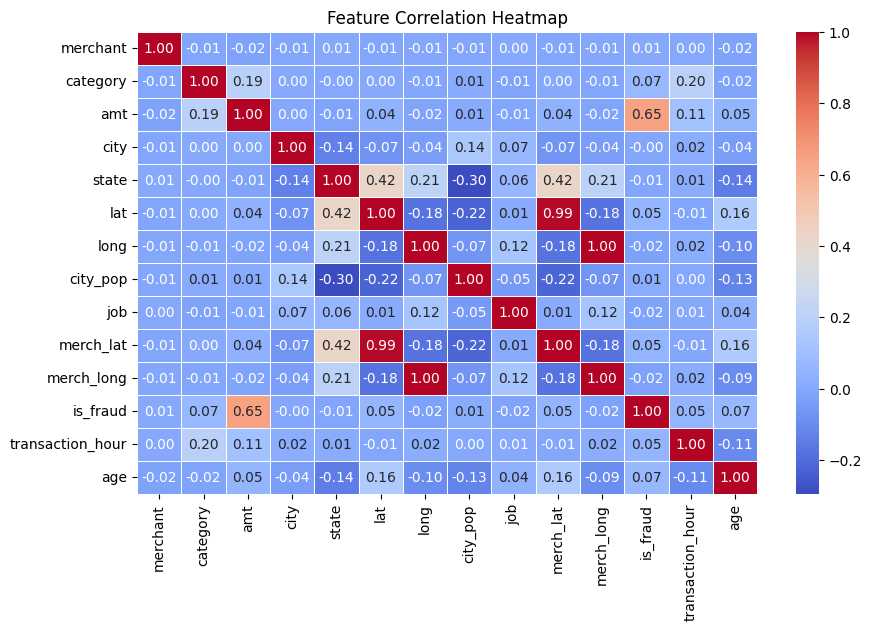

             Feature  MI Score  RF Importance
0                amt  0.238045       0.575073
1   transaction_hour  0.097220       0.139142
2                lat  0.052011       0.017067
3           merchant  0.047570       0.027332
4               long  0.047566       0.013986
5           city_pop  0.046458       0.017905
6               city  0.046068       0.017011
7                job  0.038873       0.017430
8           category  0.036133       0.083569
9                age  0.024114       0.025449
10         merch_lat  0.006407       0.028817
11             state  0.001931       0.008938
12        merch_long  0.001392       0.028280


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'RF Importance': rf.feature_importances_}).sort_values(by='RF Importance', ascending=False)

feature_importance_df = mi_scores_df.merge(rf_feature_importance, on="Feature")

print(feature_importance_df)

In [ ]:
selected_features = ['amt', 'transaction_hour', 'category', 'merchant', 'age', 'city_pop', 'is_fraud']
df_selected = df[selected_features]

print(df_selected.head())

      amt  transaction_hour  category  merchant  age  city_pop  is_fraud
0   14.37                 0         3       179   85       145         1
1  966.11                15        11       564   85       145         1
2   49.61                22         9       682   85       145         1
3  295.26                23         4       537   85       145         1
4   18.17                23         5       352   85       145         1


In [ ]:
df_selected.shape

(14446, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['amt', 'transaction_hour', 'age', 'city_pop']

scaler = StandardScaler()
df_selected[num_cols] = scaler.fit_transform(df_selected[num_cols])

df_selected.head()

,amt,transaction_hour,category,merchant,age,city_pop,is_fraud
0,-0.475741,-1.787929,3,179,1.854812,-0.366513,1
1,3.638209,0.269577,11,564,1.854812,-0.366513,1
2,-0.323414,1.229747,9,682,1.854812,-0.366513,1
3,0.738422,1.366914,4,537,1.854812,-0.366513,1
4,-0.459315,1.366914,5,352,1.854812,-0.366513,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df_selected.drop(columns=['is_fraud'])
y = df_selected['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

SMOTE - Synthetic Minority oversampling Technique

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_smote, y_train_smote)

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9111
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2521
           1       0.62      0.76      0.69       369

    accuracy                           0.91      2890
   macro avg       0.79      0.85      0.82      2890
weighted avg       0.92      0.91      0.91      2890



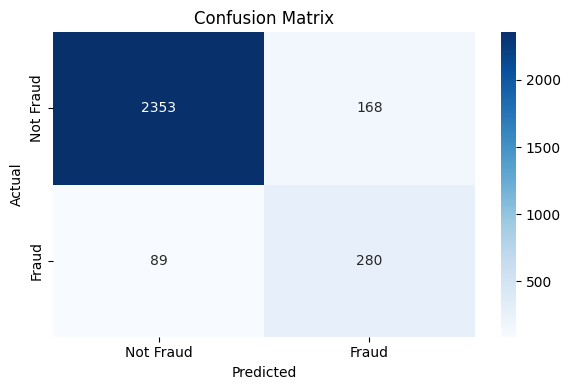

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9419
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2521
           1       0.71      0.91      0.80       369

    accuracy                           0.94      2890
   macro avg       0.85      0.93      0.88      2890
weighted avg       0.95      0.94      0.94      2890



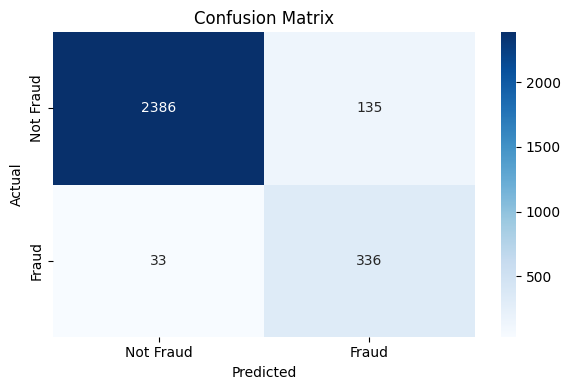

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Random Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=80, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9723
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2521
           1       0.87      0.92      0.89       369

    accuracy                           0.97      2890
   macro avg       0.93      0.95      0.94      2890
weighted avg       0.97      0.97      0.97      2890



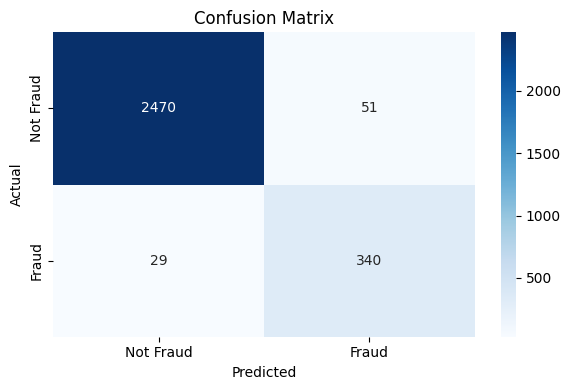

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9547
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2521
           1       0.78      0.90      0.84       369

    accuracy                           0.95      2890
   macro avg       0.88      0.93      0.90      2890
weighted avg       0.96      0.95      0.96      2890



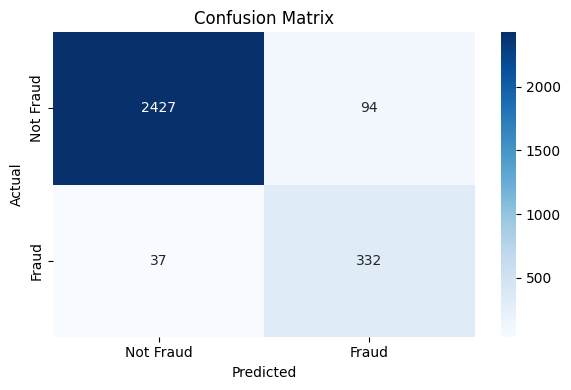

In [ ]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

XGBoost-Extreme Gradient Boost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9758
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2521
           1       0.89      0.92      0.91       369

    accuracy                           0.98      2890
   macro avg       0.94      0.95      0.95      2890
weighted avg       0.98      0.98      0.98      2890



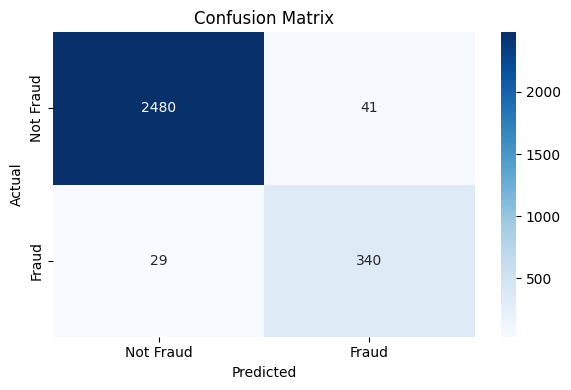

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

LightGBM - Light Gradient Boosting Machine

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_smote, y_train_smote)

y_pred_lgbm = lgbm_model.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 10080, number of negative: 10080
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 20160, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Accuracy: 0.9734
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2521
           1       0.87      0.92      0.90       369

    accuracy                           0.97      2890
   macro avg       0.93      0.95      0.94      2890
weighted avg       0.97      0.97      0.97      2890



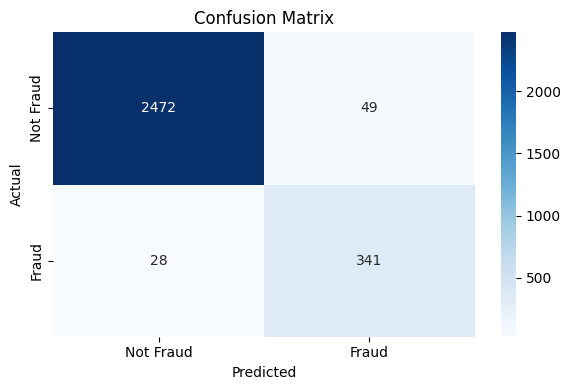

In [ ]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Ensembling Learning

In [ ]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric="logloss")),
    ('lgbm', LGBMClassifier())
]

meta_learner = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

stacking_model.fit(X_train_smote, y_train_smote)

y_pred_stack = stacking_model.predict(X_test)

accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Ensemble Accuracy: {accuracy_stack:.4f}")
print(classification_report(y_test, y_pred_stack))

[LightGBM] [Info] Number of positive: 10080, number of negative: 10080
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 20160, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 8064, number of negative: 8064
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 16128, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 8064, number of negative: 8064
[LightGBM] [Info] Auto-choosing col-wise multi-threading,

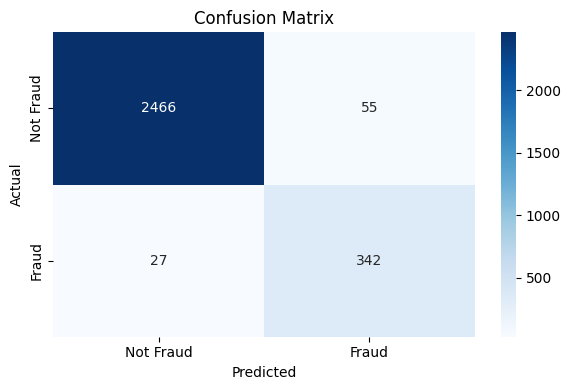

In [ ]:
cm_stack = confusion_matrix(y_test, y_pred_stack)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric="logloss")),
    ('lgbm', LGBMClassifier())
], voting='hard')

voting_model.fit(X_train_smote, y_train_smote)

y_pred_vote = voting_model.predict(X_test)

accuracy_vote = accuracy_score(y_test, y_pred_vote)
print(f"Voting Ensemble Accuracy: {accuracy_vote:.4f}")
print(classification_report(y_test, y_pred_vote))

[LightGBM] [Info] Number of positive: 10080, number of negative: 10080
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 20160, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Voting Ensemble Accuracy: 0.9747
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2521
           1       0.89      0.92      0.90       369

    accuracy                           0.97      2890
   macro avg       0.94      0.95      0.94      2890
weighted avg       0.98      0.97      0.97      2890



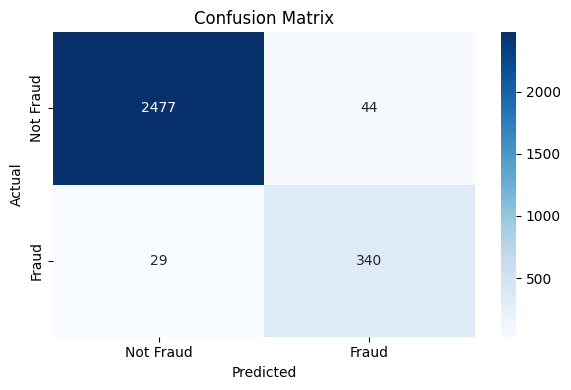

In [ ]:
cm_vote = confusion_matrix(y_test, y_pred_vote)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_vote, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6295 - loss: 1.9145 - val_accuracy: 0.2904 - val_loss: 1.8070
Epoch 2/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8166 - loss: 0.4425 - val_accuracy: 0.8445 - val_loss: 0.2818
Epoch 3/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8405 - loss: 0.4251 - val_accuracy: 0.7056 - val_loss: 0.7400
Epoch 4/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8518 - loss: 0.4170 - val_accuracy: 0.5816 - val_loss: 1.0179
Epoch 5/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8599 - loss: 0.3996 - val_accuracy: 0.7579 - val_loss: 0.6342
Epoch 6/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 0.3966 - val_accuracy: 0.7768 - val_loss: 0.5158
Epoch 7/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8689 - loss: 0.3734 - val_accuracy: 0.8065 - val_loss: 0.3404
Epoch 8/10
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8679 - loss: 0.3708 - val_accuracy: 0.

In [ ]:
y_pred_nn = model.predict(X_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred_labels = (y_pred > 0.5).astype(int)

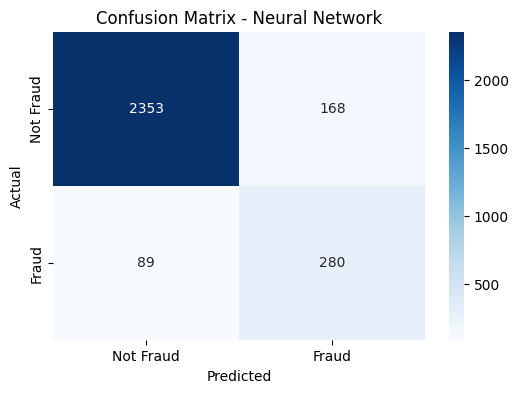

In [ ]:
cm_nn = confusion_matrix(y_test, y_pred_labels)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to stop training when validation loss stops improving
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=50,  # can still set high, early stopping will stop earlier
    validation_data=(X_train, y_train),
    callbacks=[early_stop],
    batch_size=32
)


Epoch 1/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9298 - loss: 0.2540 - val_accuracy: 0.9296 - val_loss: 0.2514
Epoch 2/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9352 - loss: 0.2495 - val_accuracy: 0.9481 - val_loss: 0.2245
Epoch 3/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9396 - loss: 0.2316 - val_accuracy: 0.9496 - val_loss: 0.2123
Epoch 4/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9361 - loss: 0.2407 - val_accuracy: 0.9301 - val_loss: 0.2291
Epoch 5/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9347 - loss: 0.2367 - val_accuracy: 0.9325 - val_loss: 0.2142
Epoch 6/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9401 - loss: 0.2201 - val_accuracy: 0.9305 - val_loss: 0.2174


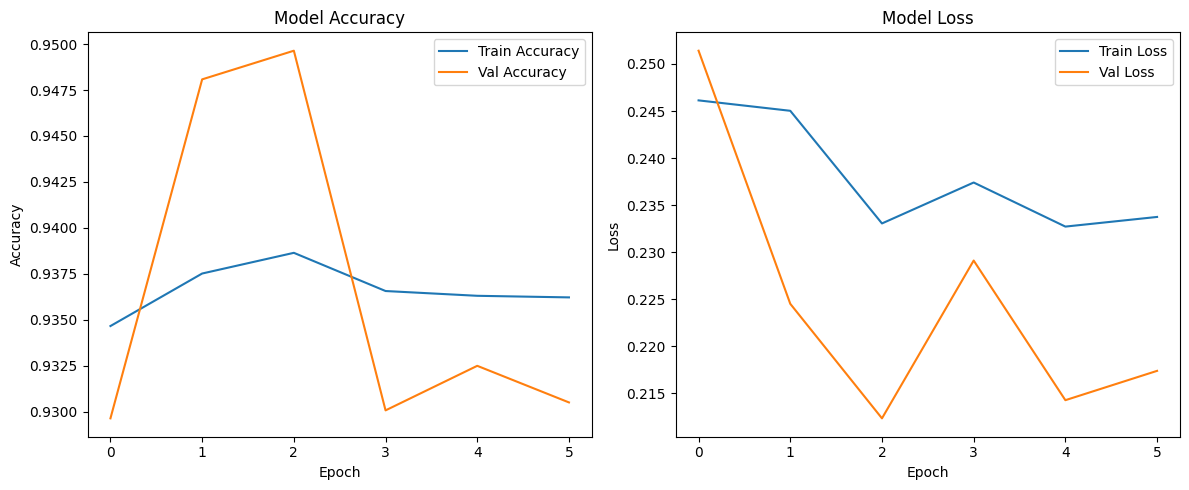

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
testdf=pd.read_csv('/content/fraudTest.csv')

In [ ]:
from datetime import datetime

testdf['trans_date_trans_time'] = pd.to_datetime(testdf['trans_date_trans_time'], errors='coerce', infer_datetime_format=True)
testdf['dob'] = pd.to_datetime(testdf['dob'], errors='coerce', dayfirst=True, infer_datetime_format=True)

testdf['transaction_hour'] = testdf['trans_date_trans_time'].dt.hour
testdf['age'] = (pd.Timestamp.now() - testdf['dob']).dt.days // 365

testdf.drop(columns=['trans_date_trans_time', 'dob', 'trans_num'], inplace=True)

testdf.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,age
0,0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,12,57
1,1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,12,35
2,2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,12,54
3,3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,12,37
4,4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,12,69


In [ ]:
selected_features = ['amt', 'transaction_hour', 'category', 'merchant', 'age', 'city_pop', 'is_fraud']
testdf = testdf[selected_features]
testdf.head()

,amt,transaction_hour,category,merchant,age,city_pop,is_fraud
0,2.86,12,personal_care,fraud_Kirlin and Sons,57,333497,0
1,29.84,12,personal_care,fraud_Sporer-Keebler,35,302,0
2,41.28,12,health_fitness,"fraud_Swaniawski, Nitzsche and Welch",54,34496,0
3,60.05,12,misc_pos,fraud_Haley Group,37,54767,0
4,3.19,12,travel,fraud_Johnston-Casper,69,1126,0


In [ ]:
for col in categorical_cols:
    if col in testdf.columns:
        le = label_encoders[col]
        # Handle unseen labels
        testdf[col] = testdf[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

In [ ]:
testdf[num_cols] = scaler.transform(testdf[num_cols])

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming testdf is the final test set without the target column
X_test_test = testdf.drop(columns=['is_fraud'])
y_test_test = testdf['is_fraud']

test_data = X_test_test.copy()
test_data['is_fraud'] = y_test_test

# Drop rows with any NaNs
test_data = test_data.dropna()

# Split them back
X_test_test = test_data.drop(columns=['is_fraud'])
y_test_test = test_data['is_fraud']
# Predict and evaluate each model

print("TEST DATA SET ACCURACIES:...")
# 1. Logistic Regression
y_pred_lr_test = lr_model.predict(X_test_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test_test, y_pred_lr_test))

# 2. Decision Tree
y_pred_dt_test = dt_model.predict(X_test_test)
print("Decision Tree Accuracy:", accuracy_score(y_test_test, y_pred_dt_test))

# 3. Random Forest
y_pred_rf_test = rf_model.predict(X_test_test)
print("Random Forest Accuracy:", accuracy_score(y_test_test, y_pred_rf_test))

# 4. GBoost
y_pred_gb_test = gb_model.predict(X_test_test)
print("GBoost Accuracy:", accuracy_score(y_test_test, y_pred_gb_test))

# 5. XGBoost
y_pred_xgb_test = xgb_model.predict(X_test_test)
print("XGBoost Accuracy:", accuracy_score(y_test_test, y_pred_xgb_test))

# 6. LGBoost
y_pred_lgbm_test = lgbm_model.predict(X_test_test)
print("LGBoost Accuracy:", accuracy_score(y_test_test, y_pred_lgbm_test))

# 7. Stacking Model
y_pred_stack_test = stacking_model.predict(X_test_test)
print("Stacking Model Accuracy:", accuracy_score(y_test_test, y_pred_stack_test))

# 8. Voting Model
y_pred_voting_test = voting_model.predict(X_test_test)
print("Voting Model Accuracy:", accuracy_score(y_test_test, y_pred_voting_test))

# 9. Neural Network (Keras)
y_pred_nn_test = model.predict(X_test_test)
y_pred_nn_classes = (y_pred_nn_test > 0.5).astype(int)
print("Neural Network Accuracy:", accuracy_score(y_test_test, y_pred_nn_classes))

TEST DATA SET ACCURACIES:...
Logistic Regression Accuracy: 0.959493916889651
Decision Tree Accuracy: 0.7222571119576621
Random Forest Accuracy: 0.9454256557720718
GBoost Accuracy: 0.9322751246583255
XGBoost Accuracy: 0.9162940262974633
LGBoost Accuracy: 0.9739004784792314
Stacking Model Accuracy: 0.9407074438700135
Voting Model Accuracy: 0.9605214145998248
17367/17367 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step
Neural Network Accuracy: 0.924265681036639


In [ ]:
print("TRAIN DATA SET ACCURACIES:...")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("GBoost Accuracy:", accuracy_score(y_test, y_pred_gb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("LGBoost Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Voting Model Accuracy:", accuracy_score(y_test, y_pred_vote))

# 9. Neural Network (Keras)
y_pred_nn_test = model.predict(X_test)
y_pred_nn_classes = (y_pred_nn > 0.5).astype(int)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn_classes))

TRAIN DATA SET ACCURACIES:...
Logistic Regression Accuracy: 0.9110726643598616
Decision Tree Accuracy: 0.9418685121107266
Random Forest Accuracy: 0.972318339100346
GBoost Accuracy: 0.9546712802768166
XGBoost Accuracy: 0.9757785467128027
LGBoost Accuracy: 0.9733564013840831
Stacking Model Accuracy: 0.9716262975778547
Voting Model Accuracy: 0.9747404844290657
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network Accuracy: 0.8294117647058824
